# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from plot_config import *

%matplotlib inline

## Utils

In [2]:
def plot_box(
    df, size_key, sizes, target_key, tick_labels=None,
    save_filename=None, x_label=None, y_label=None,
    figsize=(11, 6), dpi=200
):
    values = []
    for size in sizes:
        group = df[df[size_key] == size]
        values.append(group[target_key])
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if tick_labels is None:
        tick_labels = sizes
    
    ax.boxplot(values, tick_labels=tick_labels)
    
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

In [20]:
def plot_line(
    df, size_key, sizes, target_key, tick_labels=None,
    save_filename=None, x_label=None, y_label=None,
    figsize=(11, 6), dpi=200
):
    values = []
    for size in sizes:
        group = df[df[size_key] == size]
        values.append(group[target_key].mean())
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if tick_labels is None:
        tick_labels = sizes
    
    ax.plot(values, marker='o', markersize=12, color='black', linewidth=1.5)
    
    ax.set_xticks(np.arange(len(tick_labels)))
    ax.set_xticklabels(tick_labels)
    
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin * .95, ymax * 1.05)
    
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

In [10]:
def plot_lines(
    df, size_key, sizes, target_key, tick_labels=None,
    save_filename=None, x_label=None, y_label=None,
    title=None, figsize=(11, 6), dpi=200
):  
    fig, ax = plt.subplots(figsize=figsize)
    
    if title is not None:
        ax.set_title(title, weight='bold')

    for i, (partition, group) in enumerate(df.groupby('partition(MB)')):
        values = group[group['run'] == 'mean'][target_key].values
        ax.plot(
            values, marker=markers[i], markersize=10, 
            linewidth=1.5, label=f'{partition}MB'
        )
    
    if tick_labels is None: tick_labels = sizes
    ax.set_xticks(np.arange(len(tick_labels)))
    ax.set_xticklabels(tick_labels)
    
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin * .95, ymax * 1.1)
    
    if x_label is not None: ax.set_xlabel(x_label)
    if y_label is not None: ax.set_ylabel(y_label)
        
    ax.legend(ncols=2)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

# Visualization

## Varying data sizes

In [3]:
df = pd.read_csv('./results/result_stats.csv')
df.head(3)

,partition(MB),data(GB),run,total_cpu_time (seconds),total_cpu_memory (MB),throughput_bps
0,25,1.0,1,7.84,714586.90,1.100589e+09
1,25,1.0,2,7.50,714586.90,1.181374e+09
2,25,1.0,3,5.89,714586.74,1.491961e+09


In [4]:
data_sizes =['1GB', '2GB', '4GB', '6GB', '8GB','10GB', 'total']
data_sizes_num =[1, 2, 4, 6, 8, 10, 12.6]

### Total_cpu_time

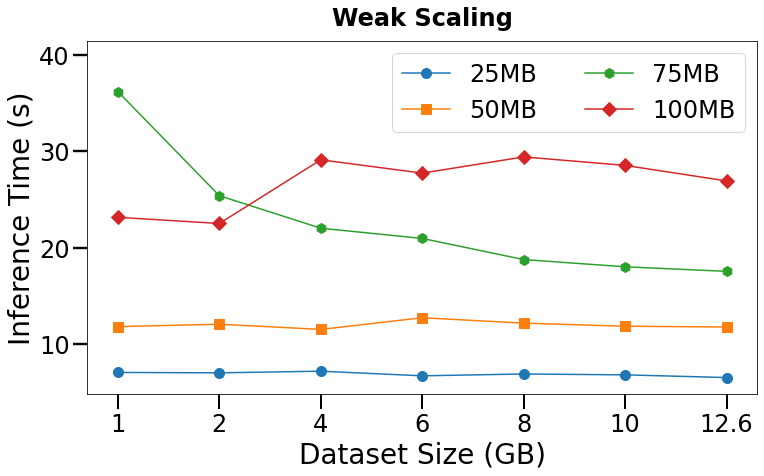

In [ ]:
plot_lines(
    df, 'data(GB)', data_sizes, tick_labels=data_sizes_num,
    target_key='total_cpu_time (seconds)', figsize=(12, 6.5),
    title='Weak Scaling',
    # save_filename='figures/inference_time.jpg',
    x_label='Dataset Size (GB)', y_label='Inference Time (s)'
)

### throughput_bps

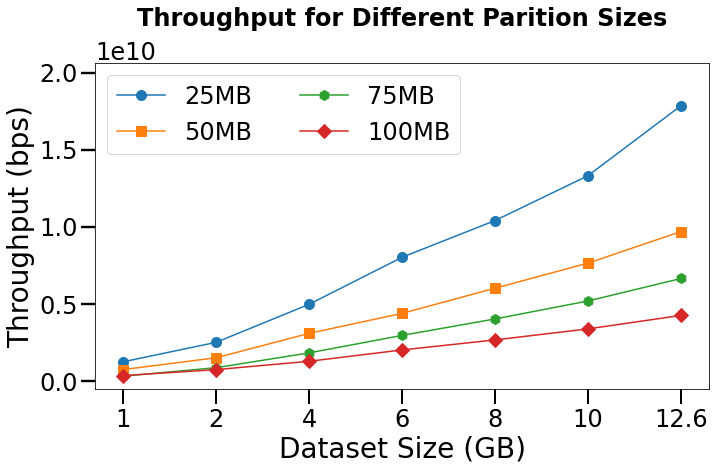

In [ ]:
plot_lines(
    df, 'data(GB)', data_sizes, tick_labels=data_sizes_num,
    target_key='throughput_bps',
    save_filename='figures/throughput.jpg',
    # title='Throughput for Different Parition Sizes',
    x_label='Dataset Size (GB)', y_label='Throughput (bps)'
)

## Varying batch sizes

In [33]:
df = pd.read_csv('./results/batch_varying_results.csv')
df.head(3)

,batch_size,run,total_cpu_time (seconds),total_cpu_memory (MB),throughput_bps
0,32,1,40.17,715180.68,2.567577e+08
1,32,2,41.06,715181.07,2.632921e+08
2,32,3,45.06,715180.00,2.561809e+08


In [34]:
batch_sizes = [32, 64, 128, 256, 512]

### total_cpu_time

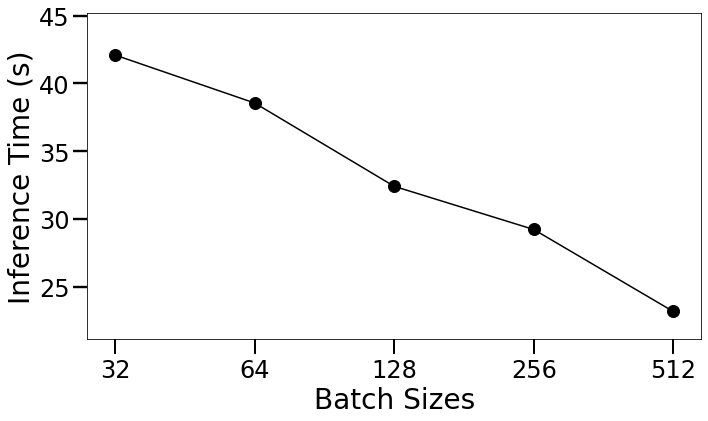

In [35]:
plot_line(
    df, 'batch_size', batch_sizes, 
    target_key='total_cpu_time (seconds)',
    # save_filename='figures/batch_varying_inference_time.jpg',
    x_label='Batch Sizes', y_label='Inference Time (s)'
)

### throughput_bps

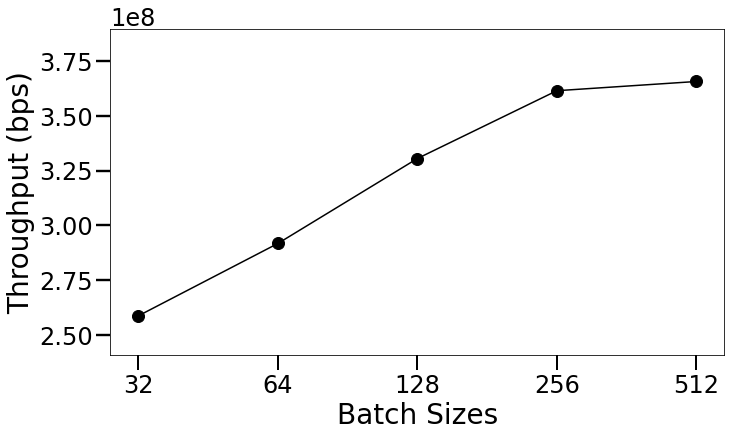

In [36]:
plot_line(
    df, 'batch_size', batch_sizes, 
    target_key='throughput_bps',
    # save_filename='figures/batch_varying_throughput.jpg',
    x_label='Batch Sizes', y_label='Throughput (bps)'
)